In [18]:
library(tidyverse)
library(dplyr)

In [45]:
tennis <- read_csv("player_stats.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



In [49]:
names(tennis)<-make.names(names(tennis),unique = TRUE)
tennis <- mutate(tennis, Country = as.factor(Country))
glimpse(tennis)

Rows: 500
Columns: 38
$ X1               <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ Age              <chr> "26 (25-04-1993)", "18 (22-12-2001)", "32 (03-11-198…
$ Country          <fct> "Brazil", "United Kingdom", "Slovakia", "Korea, Repu…
$ Plays            <chr> "Right-handed", "Left-handed", "Right-handed", "Righ…
$ Wikipedia        <chr> "Wikipedia", "Wikipedia", "Wikipedia", "Wikipedia", …
$ Current.Rank     <chr> "378 (97)", "326 (119)", "178 (280)", "236 (199)", "…
$ Best.Rank        <chr> "363 (04-11-2019)", "316 (14-10-2019)", "44 (14-01-2…
$ Name             <chr> "Oscar Jose Gutierrez", "Jack Draper", "Lukas Lacko"…
$ Backhand         <chr> NA, "Two-handed", "Two-handed", "Two-handed", "Two-h…
$ Prize.Money      <chr> NA, "$59,040", "US$3,261,567", "$374,093", "US$6,091…
$ Height           <chr> NA, NA, "185 cm", NA, "193 cm", NA, NA, NA, NA, NA, …
$ Favorite.Surface <chr> NA, NA, "Fast (H, G) 40%", NA, "Fast (H, G) 36%", "F…
$ Turned.Pro       <dbl> NA, N

In [56]:
tennis_1 <- mutate(tennis, Age = as.numeric((gsub("\\([^)]*\\)","", tennis$Age))))
tennis_2 <- mutate(tennis_1, Prize.Money = (gsub("\\s(.*)","", tennis_1$Prize.Money)))
tennis_3 <- mutate(tennis_2, Prize.Money = as.numeric((gsub("\\D+","", tennis_2$Prize.Money))))

In [73]:
tennis_4 <-select(tennis_3, Age, Prize.Money, Country) %>%
na.omit()
tennis_5 <- group_by(tennis_4, Country) %>%
summarize(age_avg = round(mean(Age), digits = 1) , prize_money_avg = round(mean(Prize.Money), digits = 0), n = n())
tennis_5

`summarise()` ungrouping output (override with `.groups` argument)



Country,age_avg,prize_money_avg,n
<fct>,<dbl>,<dbl>,<int>
Argentina,26.6,2739004,20
Australia,25.3,1693636,19
Austria,23.6,4731482,5
Barbados,27.0,611774,1
Belarus,27.0,607520,3
Belgium,30.0,3392439,6
"Bolivia, Plurinational State of",26.0,397175,1
Bosnia and Herzegovina,26.7,1661193,3
Brazil,26.1,1048249,9


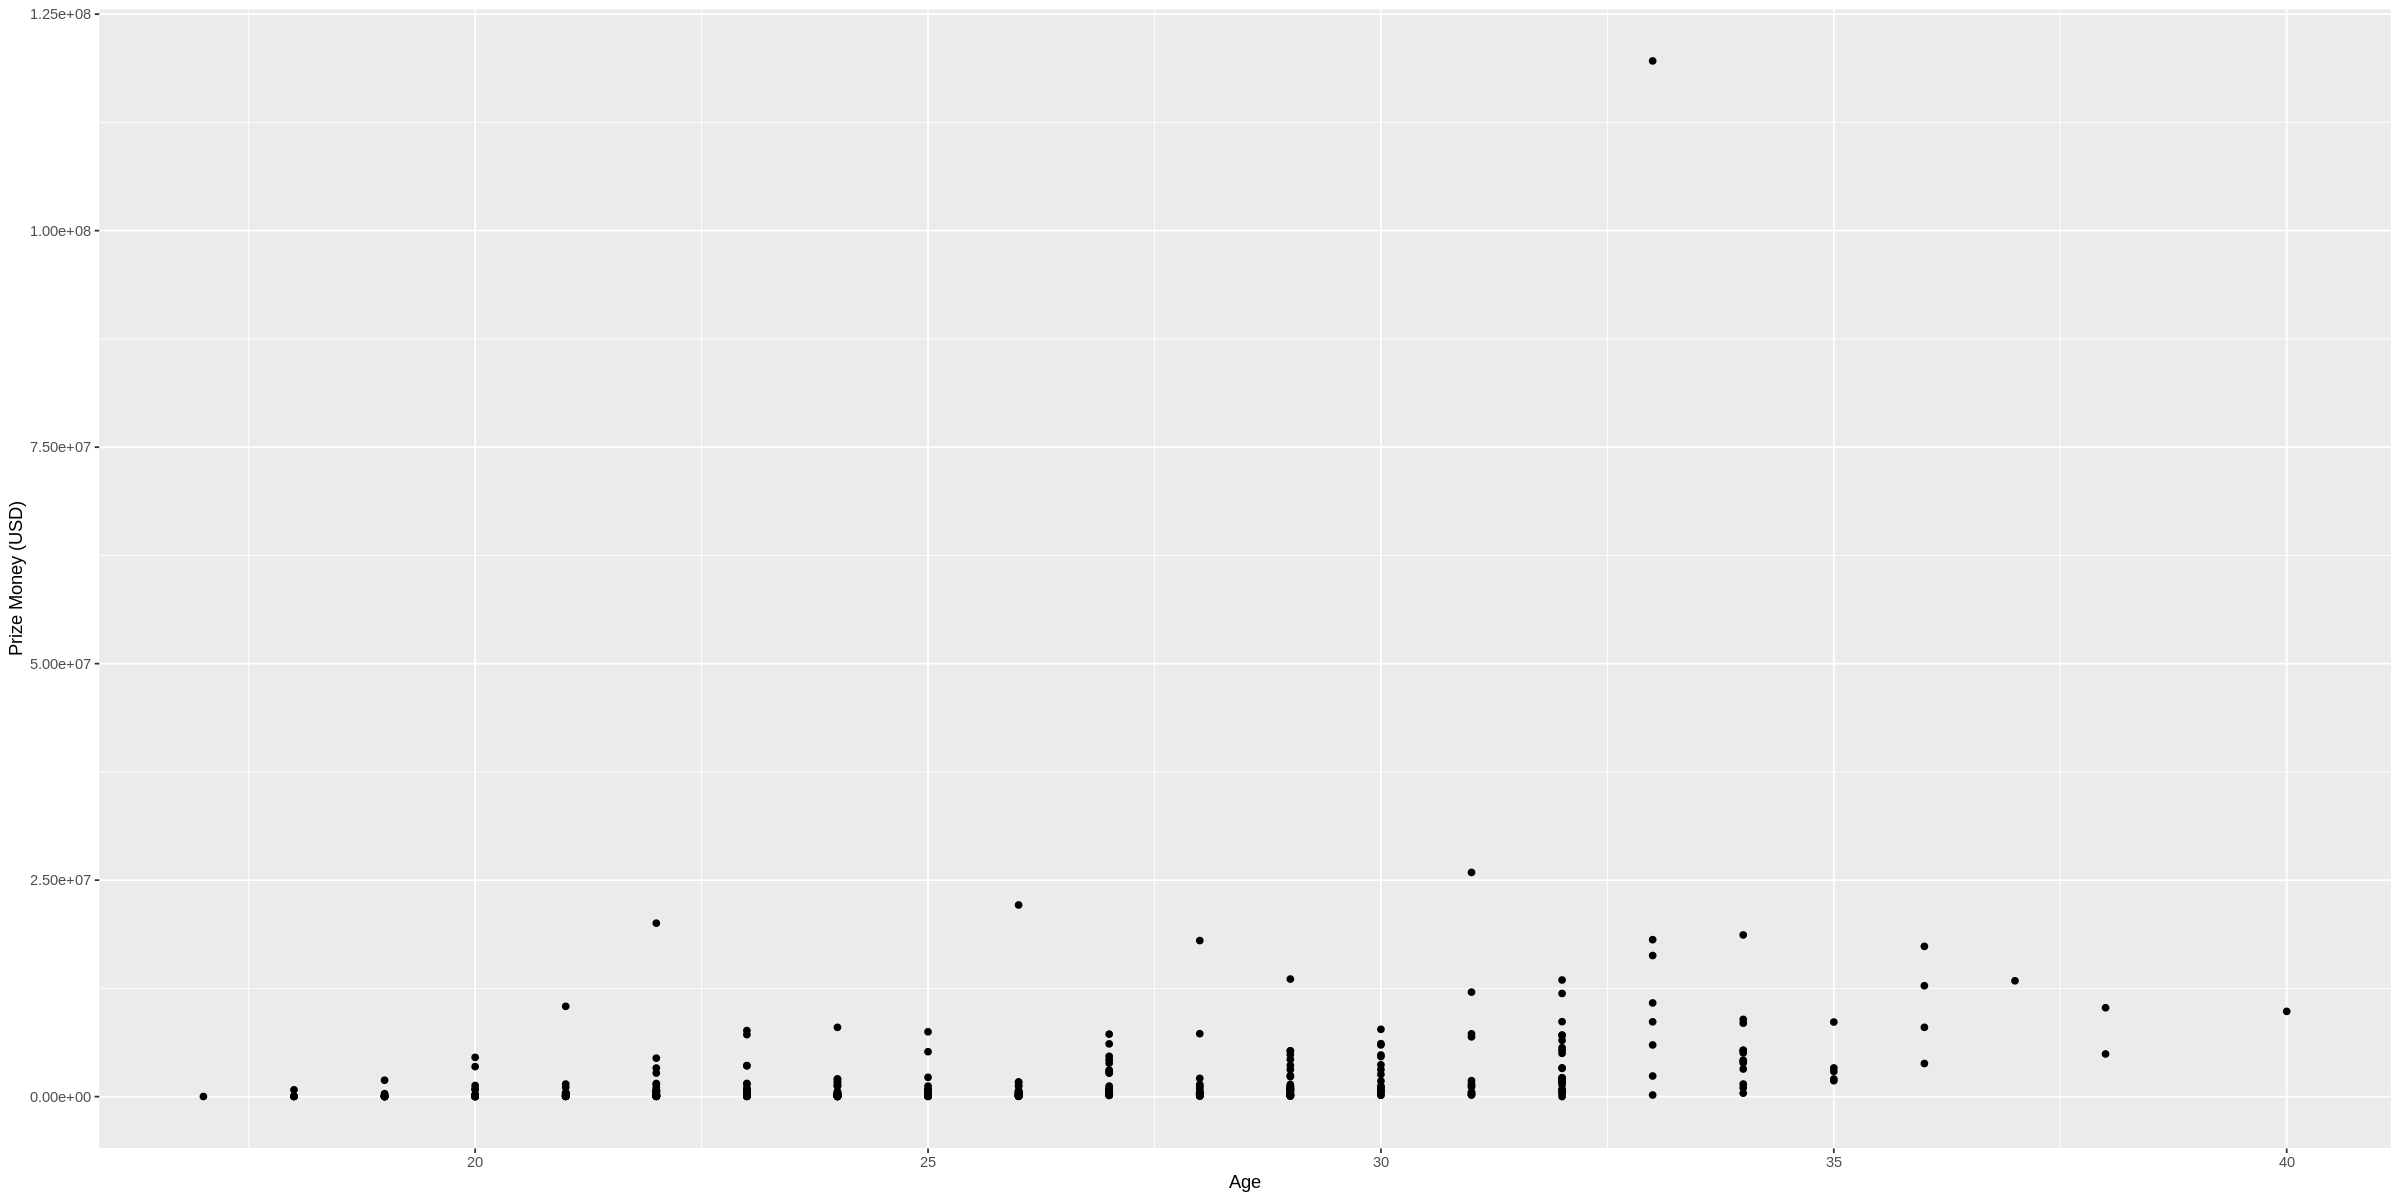

In [86]:
options(repr.plot.width = 20, repr.plot.height = 10)
tennis_plot <- ggplot(tennis_4, aes(x = Age, y = Prize.Money)) +
geom_point() +
xlab("Age") +
ylab("Prize Money (USD)")
tennis_plot